## RBF Test Cases 

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from ctypes import *
from mpl_toolkits.mplot3d import Axes3D

%run "~\Documents\GitHub\ProjetAnnuel3IBD\projet\python\encapsulate\encapsulateRBF.py"
%run "~\Documents\GitHub\ProjetAnnuel3IBD\projet\python\encapsulate\encapsulateSharedMethods.py"
pathDLL = "C:/Users/nico_/Documents/GitHub/ProjetAnnuel3IBD/projet/MLAlgorithms/ML_Library/x64/Release/ML_Library.dll"
myDll = CDLL(pathDLL)

## Classification
- <font color=green>Linear Simple</font>

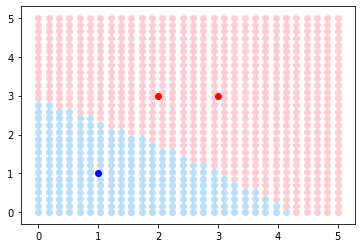

<Figure size 432x288 with 0 Axes>

In [2]:
# Points Data
Xnp = np.array([ [1, 1], [2, 3], [3, 3] ])
Ynp = np.array([ 1, -1, -1 ])
X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()

# Parameters
gamma = 0.5

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Create & Allocate RBF Model
pArrayWeight = createNaiveRBFModel(myDll, Xnp.shape[1])

# Fit RBF with classification version
fitNaiveRBFClassification(myDll, pArrayWeight, pMatrixX, pMatrixY, gamma)

X1 = np.linspace(0, 5, 30)
X2 = np.linspace(0, 5, 30)

# Predict points to test if Model is working 
displayRbfClassifResult2D(myDll, pArrayWeight, X1, X2)

# Display data points
plt.scatter(Xnp[0, 0], Xnp[0, 1], color='blue')
plt.scatter(Xnp[1:3,0], Xnp[1:3,1], color='red')
plt.show()
plt.clf()

# delete / free RBF Model
deleteNaiveRBFModel(myDll, pArrayWeight)

- <font color=green>Linear Multiple</font>

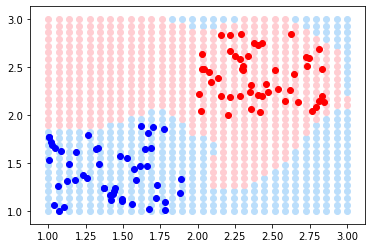

<Figure size 432x288 with 0 Axes>

In [3]:
# Points Data
Xnp = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Ynp = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])
Ynp = Ynp.flatten()

X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()


# Parameters
gamma = 0.5

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Create & Allocate RBF Model
pArrayWeight = createNaiveRBFModel(myDll, Xnp.shape[1])

# Fit RBF with classification version
fitNaiveRBFClassification(myDll, pArrayWeight, pMatrixX, pMatrixY, gamma)

X1 = np.linspace(1, 3, 30)
X2 = np.linspace(1, 3, 30)

# Predict points to test if Model is working 
displayRbfClassifResult2D(myDll, pArrayWeight, X1, X2)

# Display data points
plt.scatter(Xnp[0:50, 0], Xnp[0:50, 1], color='blue')
plt.scatter(Xnp[50:100,0], Xnp[50:100,1], color='red')
plt.show()
plt.clf()

# delete / free RBF Model
deleteNaiveRBFModel(myDll, pArrayWeight)

- <font color=green>Linear Multiple Triple Class</font>

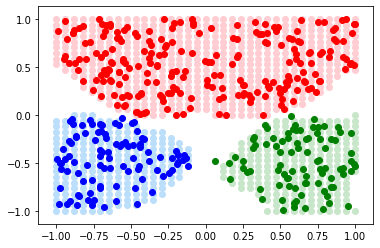

<Figure size 432x288 with 0 Axes>

In [4]:
# Points Data
Xnp = np.random.random((500, 2)) * 2.0 - 1.0
Ynp = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else #A
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else #B
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else #C
              [0, 0, 0] for p in Xnp])

X = matrixToArray(Xnp.tolist())
Y = matrixToArray(Ynp.tolist())

# Parameters
gamma = 0.5

pMatrixX = loadTestCase(myDll, X, Xnp.shape[0],  Xnp.shape[1], 1)

# Create & Allocate RBF Model
pArrayWeight1 = createNaiveRBFModel(myDll, Xnp.shape[1])
pArrayWeight2 = createNaiveRBFModel(myDll, Xnp.shape[1])
pArrayWeight3 = createNaiveRBFModel(myDll, Xnp.shape[1])

#Train A
Y1 = [ 1 if y == [1, 0, 0] else -1 for y in Ynp.tolist()]
Y1 = np.array(Y1)
pMatrixY1 = loadTestCase(myDll, Y1, Y1.shape[0], 1, 0)
fitNaiveRBFClassification(myDll, pArrayWeight1, pMatrixX, pMatrixY1, gamma)

#Train B
Y2 = [ 1 if y == [0, 1, 0] else -1 for y in Ynp.tolist()]
Y2 = np.array(Y2)
pMatrixY2 = loadTestCase(myDll, Y2, Y2.shape[0], 1, 0)
fitNaiveRBFClassification(myDll, pArrayWeight2, pMatrixX, pMatrixY2, gamma)
#Train C
Y3 = [ 1 if y == [0, 0, 1] else -1 for y in Ynp.tolist()]
Y3 = np.array(Y3)
pMatrixY3 = loadTestCase(myDll, Y3, Y3.shape[0], 1, 0)
fitNaiveRBFClassification(myDll, pArrayWeight3, pMatrixX, pMatrixY3, gamma)

X1 = np.linspace(-1, 1, 35)
X2 = np.linspace(-1, 1, 35)

# Predict points to test if Model is working 
displayRbfClassifResult2DTripleClass(myDll, pArrayWeight1, pArrayWeight2, pArrayWeight3, X1, X2)

# Display data points
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][0] == 1, enumerate(Xnp)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][0] == 1, enumerate(Xnp)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][1] == 1, enumerate(Xnp)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][1] == 1, enumerate(Xnp)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][2] == 1, enumerate(Xnp)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][2] == 1, enumerate(Xnp)))))[:,1], color='green')
plt.show()
plt.clf()

# delete / free RBF Model
deleteNaiveRBFModel(myDll, pArrayWeight1)
deleteNaiveRBFModel(myDll, pArrayWeight2)
deleteNaiveRBFModel(myDll, pArrayWeight3)



- <font color=green>Cross</font>

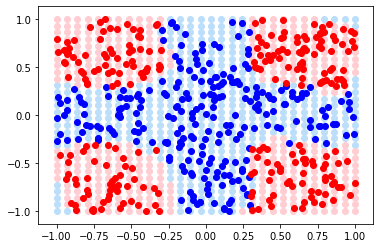

<Figure size 432x288 with 0 Axes>

In [5]:
# Points Data
Xnp = np.random.random((500, 2)) * 2.0 - 1.0
Ynp = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in Xnp])
X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()

# Parameters
gamma = 0.5

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Create & Allocate RBF Model
pArrayWeight = createNaiveRBFModel(myDll, Xnp.shape[1])

# Fit RBF with classification version
fitNaiveRBFClassification(myDll, pArrayWeight, pMatrixX, pMatrixY, gamma)

X1 = np.linspace(-1, 1, 30)
X2 = np.linspace(-1, 1, 30)

# Predict points to test if Model is working 
displayRbfClassifResult2D(myDll, pArrayWeight, X1, X2)

# Display data points
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]] == 1, enumerate(Xnp)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]] == 1, enumerate(Xnp)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]] == -1, enumerate(Xnp)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]] == -1, enumerate(Xnp)))))[:,1], color='red')
plt.show()
plt.clf()


# delete / free RBF Model
deleteNaiveRBFModel(myDll, pArrayWeight)


- <font color=green>Multi Cross</font>

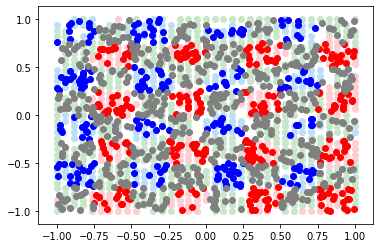

<Figure size 432x288 with 0 Axes>

In [6]:
# Points Data
Xnp = np.random.random((1000, 2)) * 2.0 - 1.0
Ynp = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else 
              [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else 
              [0, 0, 1] for p in Xnp])
X = matrixToArray(Xnp.tolist())
Y = matrixToArray(Ynp.tolist())

# Parameters
gamma = 2

pMatrixX = loadTestCase(myDll, X, Xnp.shape[0],  Xnp.shape[1], 1)

# Create & Allocate RBF Model
pArrayWeight1 = createNaiveRBFModel(myDll, Xnp.shape[1])
pArrayWeight2 = createNaiveRBFModel(myDll, Xnp.shape[1])
pArrayWeight3 = createNaiveRBFModel(myDll, Xnp.shape[1])

#Train A
Y1 = [ 1 if y == [1, 0, 0] else -1 for y in Ynp.tolist()]
Y1 = np.array(Y1)
pMatrixY1 = loadTestCase(myDll, Y1, Y1.shape[0], 1, 0)
fitNaiveRBFClassification(myDll, pArrayWeight1, pMatrixX, pMatrixY1, gamma)

#Train B
Y2 = [ 1 if y == [0, 1, 0] else -1 for y in Ynp.tolist()]
Y2 = np.array(Y2)
pMatrixY2 = loadTestCase(myDll, Y2, Y2.shape[0], 1, 0)
fitNaiveRBFClassification(myDll, pArrayWeight2, pMatrixX, pMatrixY2, gamma)

#Train C
Y3 = [ 1 if y == [0, 0, 1] else -1 for y in Ynp.tolist()]
Y3 = np.array(Y3)
pMatrixY3 = loadTestCase(myDll, Y3, Y3.shape[0], 1, 0)
fitNaiveRBFClassification(myDll, pArrayWeight3, pMatrixX, pMatrixY3, gamma)

X1 = np.linspace(-1, 1, 35)
X2 = np.linspace(-1, 1, 35)

# Predict points to test if Model is working 
displayRbfClassifResult2DTripleClass(myDll, pArrayWeight1, pArrayWeight2, pArrayWeight3, X1, X2)

# Display data points
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][0] == 1, enumerate(Xnp)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][0] == 1, enumerate(Xnp)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][1] == 1, enumerate(Xnp)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][1] == 1, enumerate(Xnp)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][2] == 1, enumerate(Xnp)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][2] == 1, enumerate(Xnp)))))[:,1], color='grey')
plt.show()
plt.clf()


# delete / free RBF Model
deleteNaiveRBFModel(myDll, pArrayWeight1)
deleteNaiveRBFModel(myDll, pArrayWeight2)
deleteNaiveRBFModel(myDll, pArrayWeight3)

- <font color=green>Xor</font>

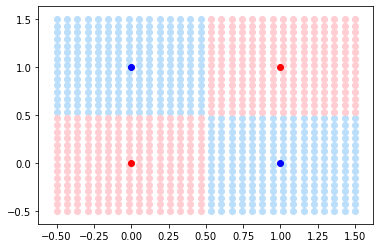

<Figure size 432x288 with 0 Axes>

In [7]:
# Points Data
Xnp = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Ynp = np.array([1, 1, -1, -1])

X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()

# Parameters
gamma = 0.5

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Create & Allocate RBF Model
pArrayWeight = createNaiveRBFModel(myDll, Xnp.shape[1])

# Fit RBF with classification version
fitNaiveRBFClassification(myDll, pArrayWeight, pMatrixX, pMatrixY, gamma)

X1 = np.linspace(-0.5, 1.5, 30)
X2 = np.linspace(-0.5, 1.5, 30)

# Predict points to test if Model is working 
displayRbfClassifResult2D(myDll, pArrayWeight, X1, X2)

# Display data points
plt.scatter(Xnp[0:2, 0], Xnp[0:2, 1], color='blue')
plt.scatter(Xnp[2:4,0], Xnp[2:4,1], color='red')
plt.show()
plt.clf()


# delete / free RBF Model
deleteNaiveRBFModel(myDll, pArrayWeight)

## Regression
- <font color=green>Linear Simple 2D</font>

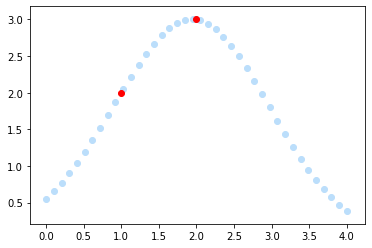

<Figure size 432x288 with 0 Axes>

In [8]:
# Points Data
X = [ 1, 2 ]
Y = [ 2, 3 ]
Xnp = np.array([ [1], [2] ])
Ynp = np.array([ 2, 3])

# Parameters
gamma = 0.5

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Create & Allocate RBF Model
pArrayWeight = createNaiveRBFModel(myDll, Xnp.shape[1])

# Fit RBF with classification version
fitNaiveRBFRegression(myDll, pArrayWeight, pMatrixX, pMatrixY, gamma)

X1 = np.linspace(0, 4, 40)

# Predict points to test if Model is working 
displayRBFRegResult2D(myDll, pArrayWeight, X1, X2)

# Display data points
plt.scatter(X, Y, color='red')
plt.show()
plt.clf()

# delete / free RBF Model
deleteNaiveRBFModel(myDll, pArrayWeight)

- <font color=green> Not Linear Simple 2D</font>

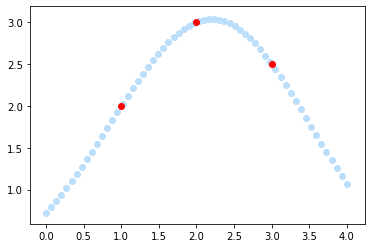

<Figure size 432x288 with 0 Axes>

In [9]:
# Points Data
Xnp = np.array([ [1], [2], [3] ])
Ynp = np.array([ 2, 3, 2.5])
X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()

# Parameters
gamma = 0.5

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Create & Allocate RBF Model
pArrayWeight = createNaiveRBFModel(myDll, Xnp.shape[1])

# Fit RBF with classification version
fitNaiveRBFRegression(myDll, pArrayWeight, pMatrixX, pMatrixY, gamma)

X1 = np.linspace(0, 4, 60)

# Predict points to test if Model is working 
displayRBFRegResult2D(myDll, pArrayWeight, X1, X2)

# Display data points
plt.scatter(X, Y, color='red')
plt.show()
plt.clf()

# delete / free RBF Model
deleteNaiveRBFModel(myDll, pArrayWeight)

- <font color=green>Linear Simple 3D n°1</font>

In [10]:
%matplotlib notebook

<IPython.core.display.Javascript object>


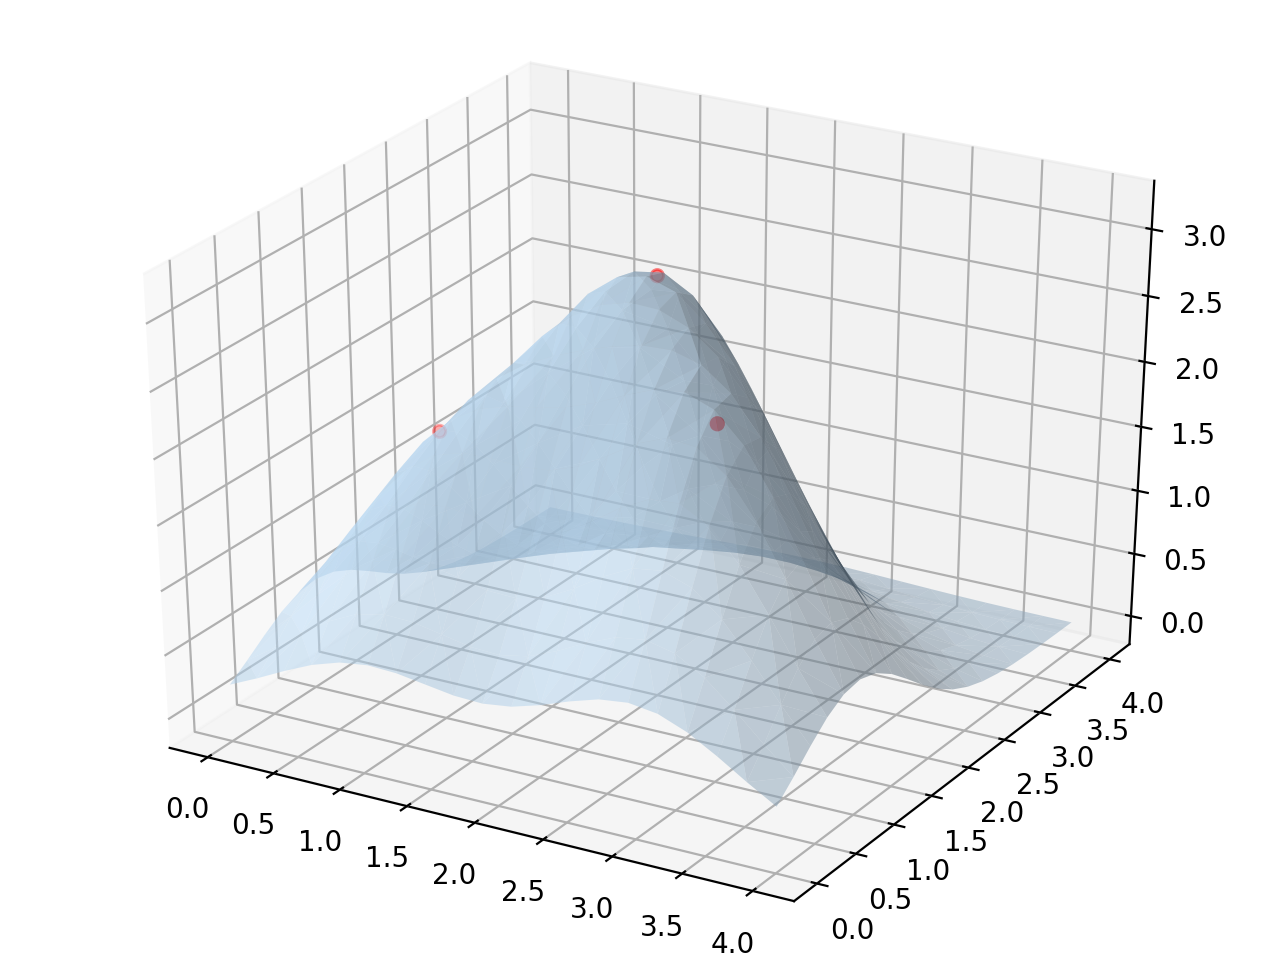

In [23]:
# Points Data
Xnp = np.array([ [1, 1], [2, 2], [3, 1] ])
Ynp = np.array([ 2, 3, 2.5 ])
X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()

# Parameters
gamma = 1

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Create & Allocate RBF Model
pArrayWeight = createNaiveRBFModel(myDll, Xnp.shape[1])

# Fit RBF with classification version
fitNaiveRBFRegression(myDll, pArrayWeight, pMatrixX, pMatrixY, gamma)

fig = plt.figure()
ax = Axes3D(fig)

X1 = np.linspace(0, 4, 20)
X2 = np.linspace(0, 4, 20)
# Predict points to test if Model is working 
displayRBFRegResult3D(myDll, pArrayWeight, ax, X1, X2)

# Display data points
ax.scatter(Xnp[:,0], Xnp[:,1], Y, color="red")
plt.show()

# delete / free RBF Model
deleteNaiveRBFModel(myDll, pArrayWeight)

- <font color=green>Linear Simple 3D n°2</font>

<IPython.core.display.Javascript object>


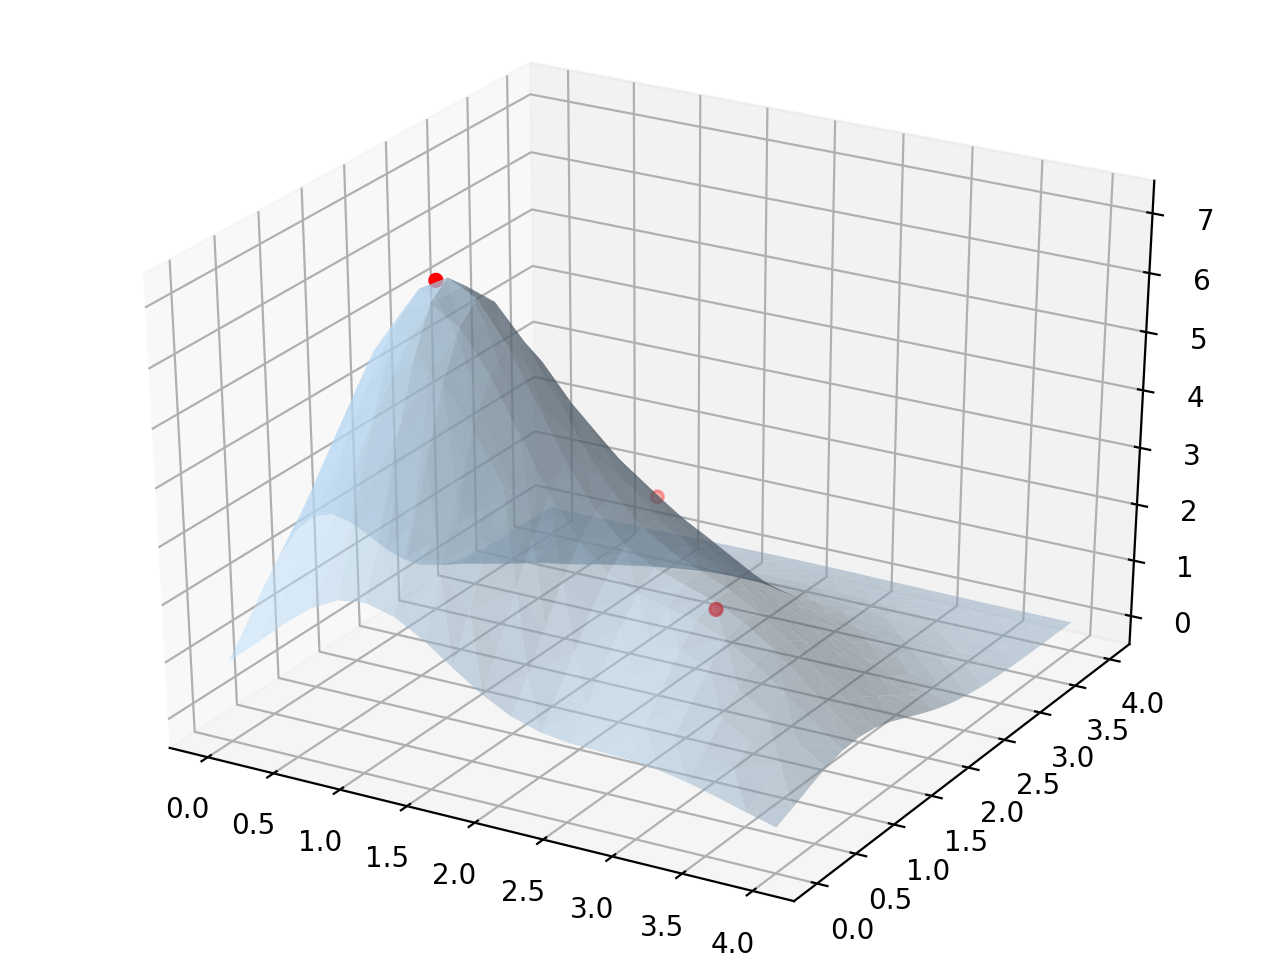

In [24]:
# Points Data
Xnp = np.array([ [1, 1], [2, 2], [3, 1] ])
Ynp = np.array([ 7, 3, 2.5 ])
X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()

# Parameters
gamma = 1
# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Create & Allocate RBF Model
pArrayWeight = createNaiveRBFModel(myDll, Xnp.shape[1])

# Fit RBF with classification version
fitNaiveRBFRegression(myDll, pArrayWeight, pMatrixX, pMatrixY, gamma)

fig = plt.figure()
ax = Axes3D(fig)

X1 = np.linspace(0, 4, 20)
X2 = np.linspace(0, 4, 20)
# Predict points to test if Model is working 
displayRBFRegResult3D(myDll, pArrayWeight, ax, X1, X2)

# Display data points
ax.scatter(Xnp[:,0], Xnp[:,1], Y, color="red")
plt.show()

# delete / free RBF Model
deleteNaiveRBFModel(myDll, pArrayWeight)

- <font color=green>Linear Simple 3D n°3</font>

<IPython.core.display.Javascript object>


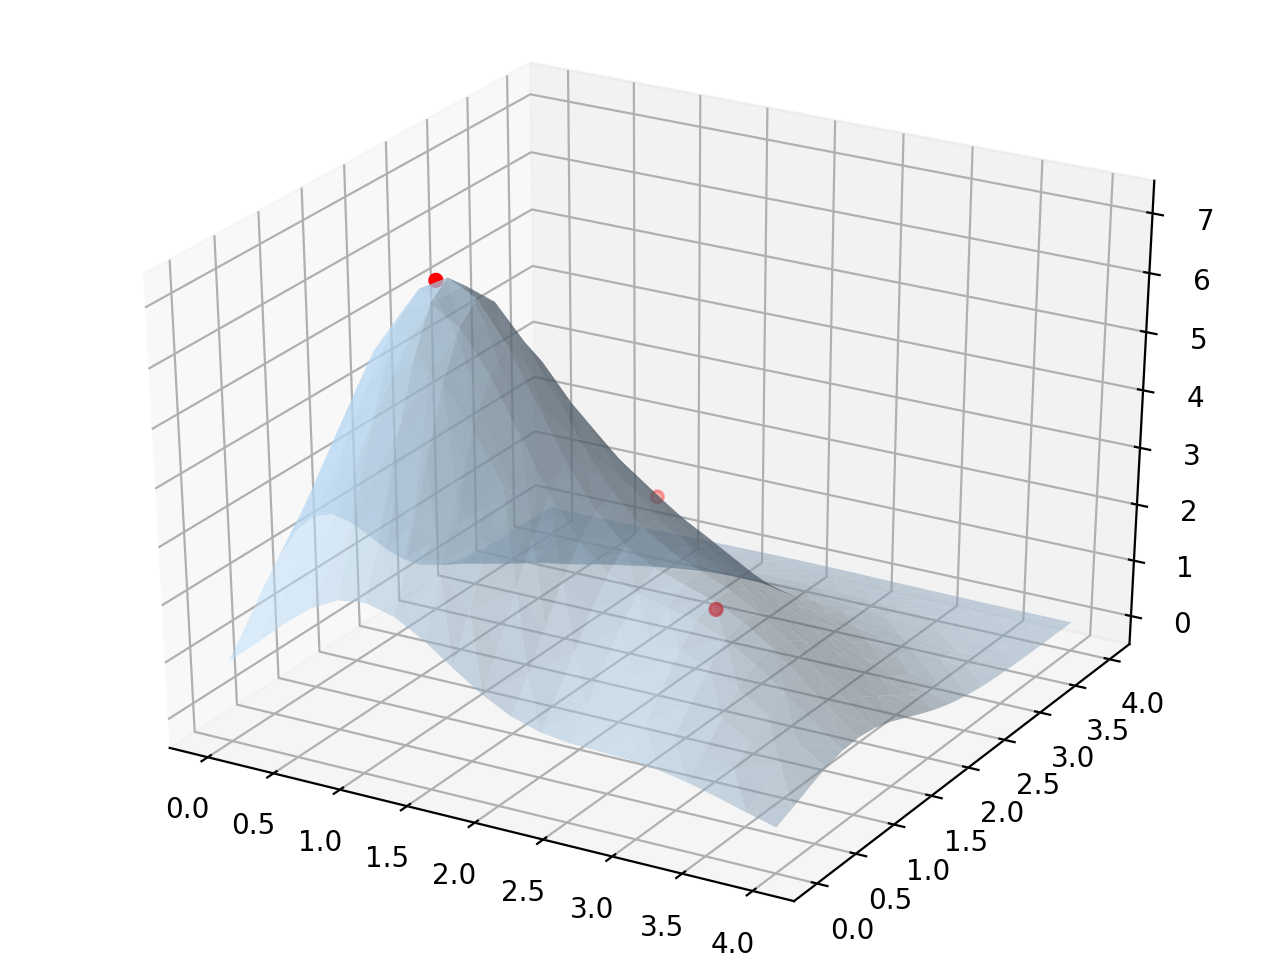

In [27]:
# Points Data
Xnp = np.array([ [1, 1], [2, 2], [3, 1] ])
Ynp = np.array([ 7, 3, 2.5 ])
X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()

# Parameters
gamma = 1
# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Create & Allocate RBF Model
pArrayWeight = createNaiveRBFModel(myDll, Xnp.shape[1])

# Fit RBF with classification version
fitNaiveRBFRegression(myDll, pArrayWeight, pMatrixX, pMatrixY, gamma)

fig = plt.figure()
ax = Axes3D(fig)


X1 = np.linspace(0, 4, 20)
X2 = np.linspace(0, 4, 20)
# Predict points to test if Model is working 
displayRBFRegResult3D(myDll, pArrayWeight, ax, X1, X2)

# Display data points
ax.scatter(Xnp[:,0], Xnp[:,1], Y, color="red")
plt.show()

# delete / free RBF Model
deleteNaiveRBFModel(myDll, pArrayWeight)

- <font color=green>Linear Tricky 3D</font>

<IPython.core.display.Javascript object>


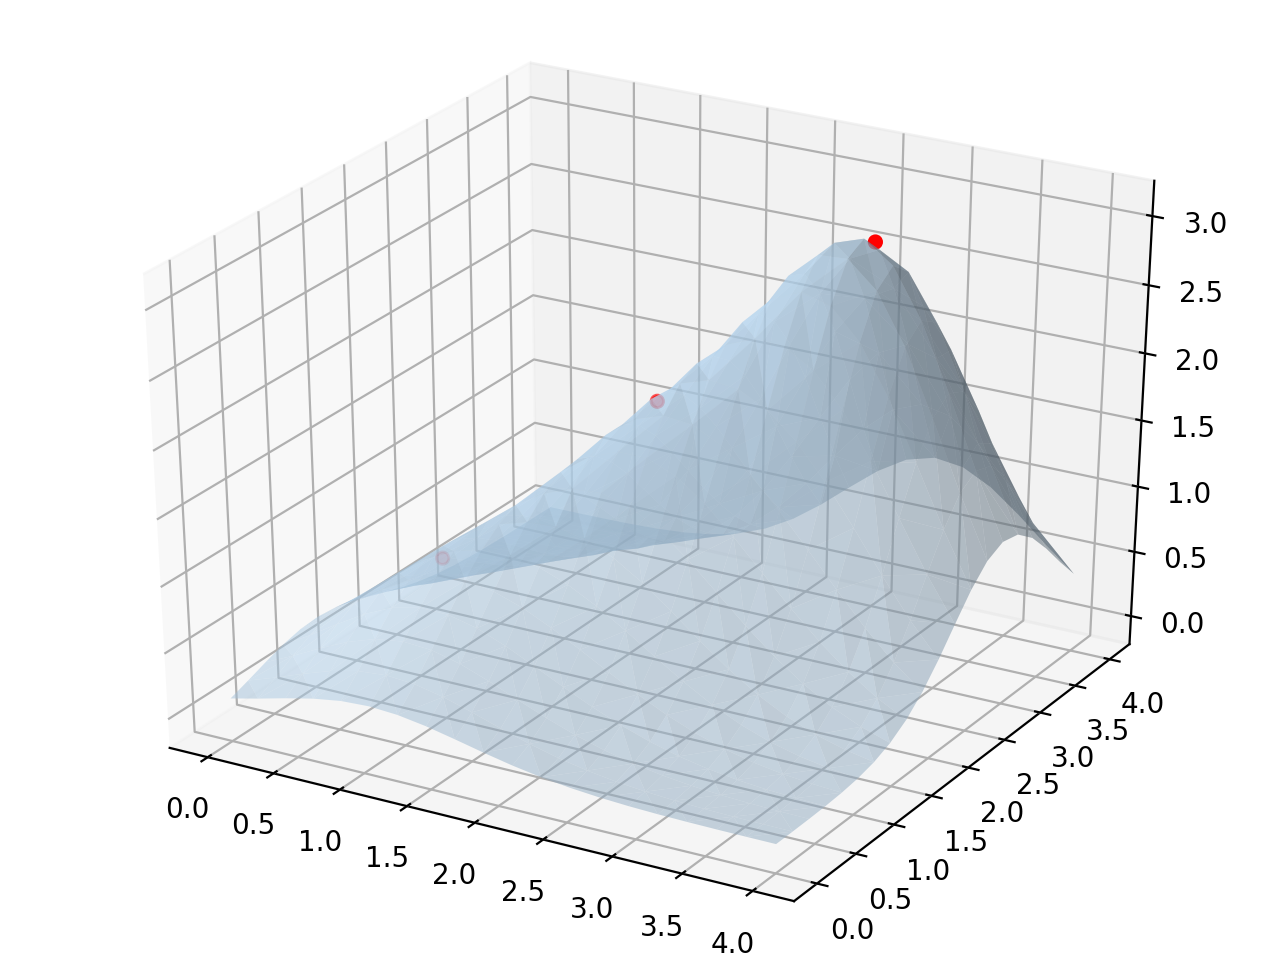

In [26]:
# Points Data
Xnp = np.array([ [1, 1], [2, 2], [3, 3] ])
Ynp = np.array([ 1, 2, 3 ])
X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()

# Parameters
gamma = 1
# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Create & Allocate RBF Model
pArrayWeight = createNaiveRBFModel(myDll, Xnp.shape[1])

# Fit RBF with classification version
fitNaiveRBFRegression(myDll, pArrayWeight, pMatrixX, pMatrixY, gamma)

fig = plt.figure()
ax = Axes3D(fig)


X1 = np.linspace(0, 4, 20)
X2 = np.linspace(0, 4, 20)
# Predict points to test if Model is working 
displayRBFRegResult3D(myDll, pArrayWeight, ax, X1, X2)

# Display data points
ax.scatter(Xnp[:,0], Xnp[:,1], Y, color="red")
plt.show()

# delete / free RBF Model
deleteNaiveRBFModel(myDll, pArrayWeight)

- <font color=green>Not Linear Simple 3D</font>

<IPython.core.display.Javascript object>


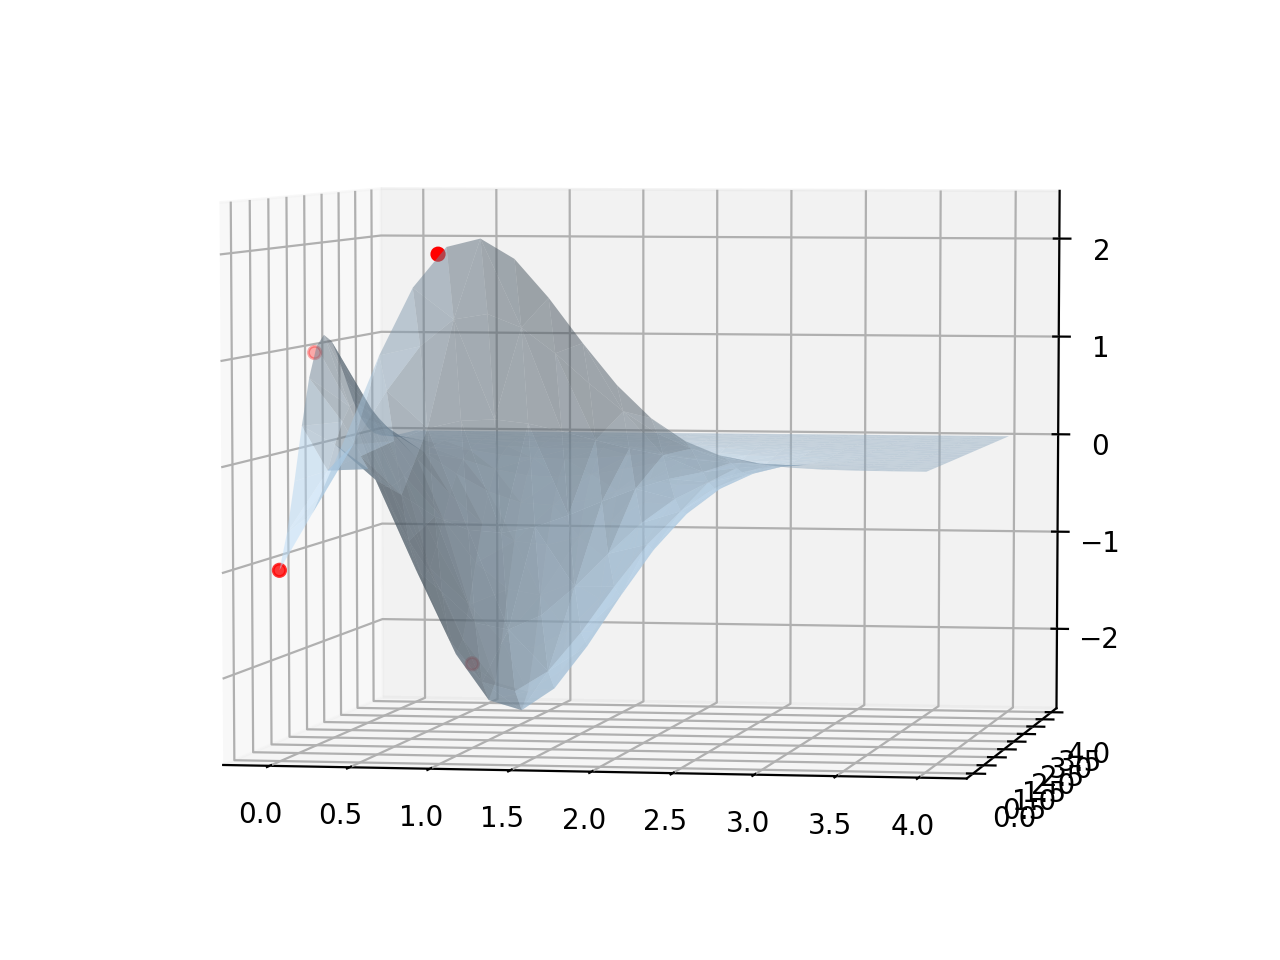

In [28]:
# Points Data
Xnp = np.array([ [1, 0], [0, 1], [1, 1], [0, 0] ])
Ynp = np.array([ 2, 1, -2, -1 ])
X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()

# Parameters
gamma = 1
# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Create & Allocate RBF Model
pArrayWeight = createNaiveRBFModel(myDll, Xnp.shape[1])

# Fit RBF with classification version
fitNaiveRBFRegression(myDll, pArrayWeight, pMatrixX, pMatrixY, gamma)

fig = plt.figure()
ax = Axes3D(fig)


X1 = np.linspace(0, 4, 20)
X2 = np.linspace(0, 4, 20)
# Predict points to test if Model is working 
displayRBFRegResult3D(myDll, pArrayWeight, ax, X1, X2)

# Display data points
ax.scatter(Xnp[:,0], Xnp[:,1], Y, color="red")
plt.show()

# delete / free RBF Model
deleteNaiveRBFModel(myDll, pArrayWeight)
